### 5章 係り受け解析

In [28]:
import CaboCha
import re
with open("ai.ja.txt", "r", encoding="utf-8_sig") as f1, open("ai.ja.txt.parsed", "w", encoding="utf-8_sig") as f2:
    for line in f1.readlines():
        line = re.sub("（）", "", line)
        result = CaboCha.Parser("-f1").parseToString(line)
        f2.write(result)
        

**40. 係り受け解析結果の読み込み（形態素）**

In [29]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

with open("ai.ja.txt.parsed", "r", encoding="utf-8_sig") as f:
    morphs = []
    sent = []
    for line in f:
        if line == "EOS\n":
            morphs.append(sent)
            sent = []
        elif line[0] == "*":
            continue
        else:
            line = line.split("\t")
            surface = line[0]
            line = line[1].split(",")
            base = line[6]
            pos = line[0]
            pos1 = line[1]
            sent.append(Morph(surface, base, pos, pos1))

for morph in morphs[2]:
    print(vars(morph))

{'surface': '人工知能', 'base': '人工知能', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': 'AI', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': 'A.I.', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{'surface': '『', 'base': '『', 'pos': '記号', 'pos1': '

**41. 係り受け解析結果の読み込み（文節・係り受け）**

In [30]:
class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []

with open("ai.ja.txt.parsed", "r", encoding="utf-8_sig") as f:
    chunks = []
    sent = []
    for line in f:
        if line == "EOS\n":
            for i, morph in enumerate(sent):
                if morph.dst != -1:
                    sent[morph.dst].srcs.append(i)
            chunks.append(sent)
            sent = []
        elif line[0] == "*":
            dst = int(line.split(" ")[2][:-1])
            sent.append(Chunk([], dst))
        else:
            line = line.split("\t")
            surface = line[0]
            line = line[1].split(",")
            base = line[6]
            pos = line[0]
            pos1 = line[1]
            sent[-1].morphs.append(Morph(surface, base, pos, pos1))

for chunk in chunks[2]:
    print([morph.surface for morph in chunk.morphs], chunk.dst)

['人工知能'] 14
['（', 'じん', 'こうち', 'のう', '、', '、'] 14
['AI'] 3
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 14
['「', '『', '計算', '』', 'という'] 6
['概念', 'と'] 6
['『', 'コンピュータ', '』', 'という'] 7
['道具', 'を'] 8
['用い', 'て'] 10
['『', '知能', '』', 'を'] 10
['研究', 'する'] 11
['計算機科学', 'の'] 12
['一', '分野', '」', 'を'] 13
['指す'] 14
['語', '。'] 30
['「', '言語', 'の'] 17
['理解', 'や'] 17
['推論', '、'] 19
['問題解決', 'など', 'の'] 19
['知的', '行動', 'を'] 21
['人間', 'に'] 21
['代わっ', 'て'] 23
['コンピューター', 'に'] 23
['行わ', 'せる'] 24
['技術', '」', '、', 'または', '、'] 30
['「', '計算機', '（', 'コンピュータ', '）', 'による'] 27
['知的', 'な'] 27
['情報処理', 'システム', 'の'] 29
['設計', 'や'] 29
['実現', 'に関する'] 30
['研究', '分野', '」', 'と', 'も'] 31
['さ', 'れる', '。'] -1


**42. 係り元と係り先の文節の表示**

In [31]:
deps = []
for sent in chunks:
    for chunk in sent:
        if chunk.dst != -1:
            src_chunk = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
            dst_chunk = "".join([morph.surface for morph in sent[chunk.dst].morphs if morph.pos != "記号"])
            deps.append(src_chunk+"\t"+dst_chunk)
display(deps)
        

['人工知能\t語',
 'じんこうちのう\t語',
 'AI\tエーアイとは',
 'エーアイとは\t語',
 '計算という\tコンピュータという',
 '概念と\tコンピュータという',
 'コンピュータという\t道具を',
 '道具を\t用いて',
 '用いて\t研究する',
 '知能を\t研究する',
 '研究する\t計算機科学の',
 '計算機科学の\t一分野を',
 '一分野を\t指す',
 '指す\t語',
 '語\t研究分野とも',
 '言語の\t推論',
 '理解や\t推論',
 '推論\t知的行動を',
 '問題解決などの\t知的行動を',
 '知的行動を\t代わって',
 '人間に\t代わって',
 '代わって\t行わせる',
 'コンピューターに\t行わせる',
 '行わせる\t技術または',
 '技術または\t研究分野とも',
 '計算機コンピュータによる\t情報処理システムの',
 '知的な\t情報処理システムの',
 '情報処理システムの\t実現に関する',
 '設計や\t実現に関する',
 '実現に関する\t研究分野とも',
 '研究分野とも\tされる',
 '日本大百科全書ニッポニカの\t解説で',
 '解説で\t述べている',
 '情報工学者通信工学者の\t佐藤理史は',
 '佐藤理史は\t述べている',
 '次のように\t述べている',
 '人間の\t知的能力を',
 '知的能力を\t実現する',
 'コンピュータ上で\t実現する',
 '実現する\t技術ソフトウェアコンピュータシステム',
 '様々な\t技術ソフトウェアコンピュータシステム',
 '技術ソフトウェアコンピュータシステム\tある',
 '応用例は\tある',
 '自然言語処理\t機械翻訳かな漢字変換構文解析等',
 '機械翻訳かな漢字変換構文解析等\t専門家の',
 '専門家の\t推論判断を',
 '推論判断を\t模倣する',
 '模倣する\tエキスパートシステム',
 'エキスパートシステム\t画像データを',
 '画像データを\t解析して',
 '解析して\t検出抽出したりする',
 '特定の\tパターンを',
 'パターンを\t検出抽出したりする',
 '検出抽出したりする\t画像認識等が',
 '画像認識等が\tある',
 'ある\t命名された',
 '

**43. 名詞を含む文節が動詞を含む文節に係るものを抽出**

In [32]:
deps_noun_verb = []
for sent in chunks:
    for chunk in sent:
        if (chunk.dst != -1 
            and "名詞" in [morph.pos for morph in chunk.morphs] 
            and "動詞" in [morph.pos for morph in sent[chunk.dst].morphs]):
            src_chunk = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
            dst_chunk = "".join([morph.surface for morph in sent[chunk.dst].morphs if morph.pos != "記号"])
            deps_noun_verb.append(src_chunk+"\t"+dst_chunk)
display(deps_noun_verb)

['道具を\t用いて',
 '知能を\t研究する',
 '一分野を\t指す',
 '知的行動を\t代わって',
 '人間に\t代わって',
 'コンピューターに\t行わせる',
 '研究分野とも\tされる',
 '解説で\t述べている',
 '佐藤理史は\t述べている',
 '次のように\t述べている',
 '知的能力を\t実現する',
 'コンピュータ上で\t実現する',
 '技術ソフトウェアコンピュータシステム\tある',
 '応用例は\tある',
 '推論判断を\t模倣する',
 '画像データを\t解析して',
 '解析して\t検出抽出したりする',
 'パターンを\t検出抽出したりする',
 '画像認識等が\tある',
 '1956年に\t命名された',
 'ダートマス会議で\t命名された',
 'ジョン・マッカーシーにより\t命名された',
 '命名された\t使われている',
 '現在では\t使われている',
 '記号処理を\t用いた',
 '記述を\tする',
 '主体と\tする',
 '意味あいでも\t使われている',
 '思考ルーチンも\t呼ばれる',
 'ことも\tある',
 'カウンセラーを\t模倣した',
 'プログラム\t出されるが',
 '人工無脳が\t出されるが',
 '引き合いに\t出されるが',
 '計算機に\tさせようという',
 '役割を\tさせようという',
 'エキスパートシステムと\t呼ばれる',
 '実現は\t困難視されている',
 '人間が\t持つ',
 '暗黙に\t持つ',
 '記述が\tなり',
 '問題と\tなり',
 '利用が\t困難視されている',
 '困難視されている\tある',
 'アプローチとしては\t知られているが',
 'アプローチも\t知られているが',
 'GoodOldFashionedAIとの差は\tある',
 '記号的明示性に\tある',
 'その後\t集めた',
 'サポートベクターマシンが\t集めた',
 '注目を\t集めた',
 '経験を\t行う',
 '元に\t行う',
 '学習を\t行う',
 '手法も\tある',
 '宇宙において\t実装するという',
 '知性を\t表現し',
 '機械的に\t表現し',
 '表現し\t実装するという',
 '登場により\t行った',
 '流行を

**44. 係り受け木の可視化**

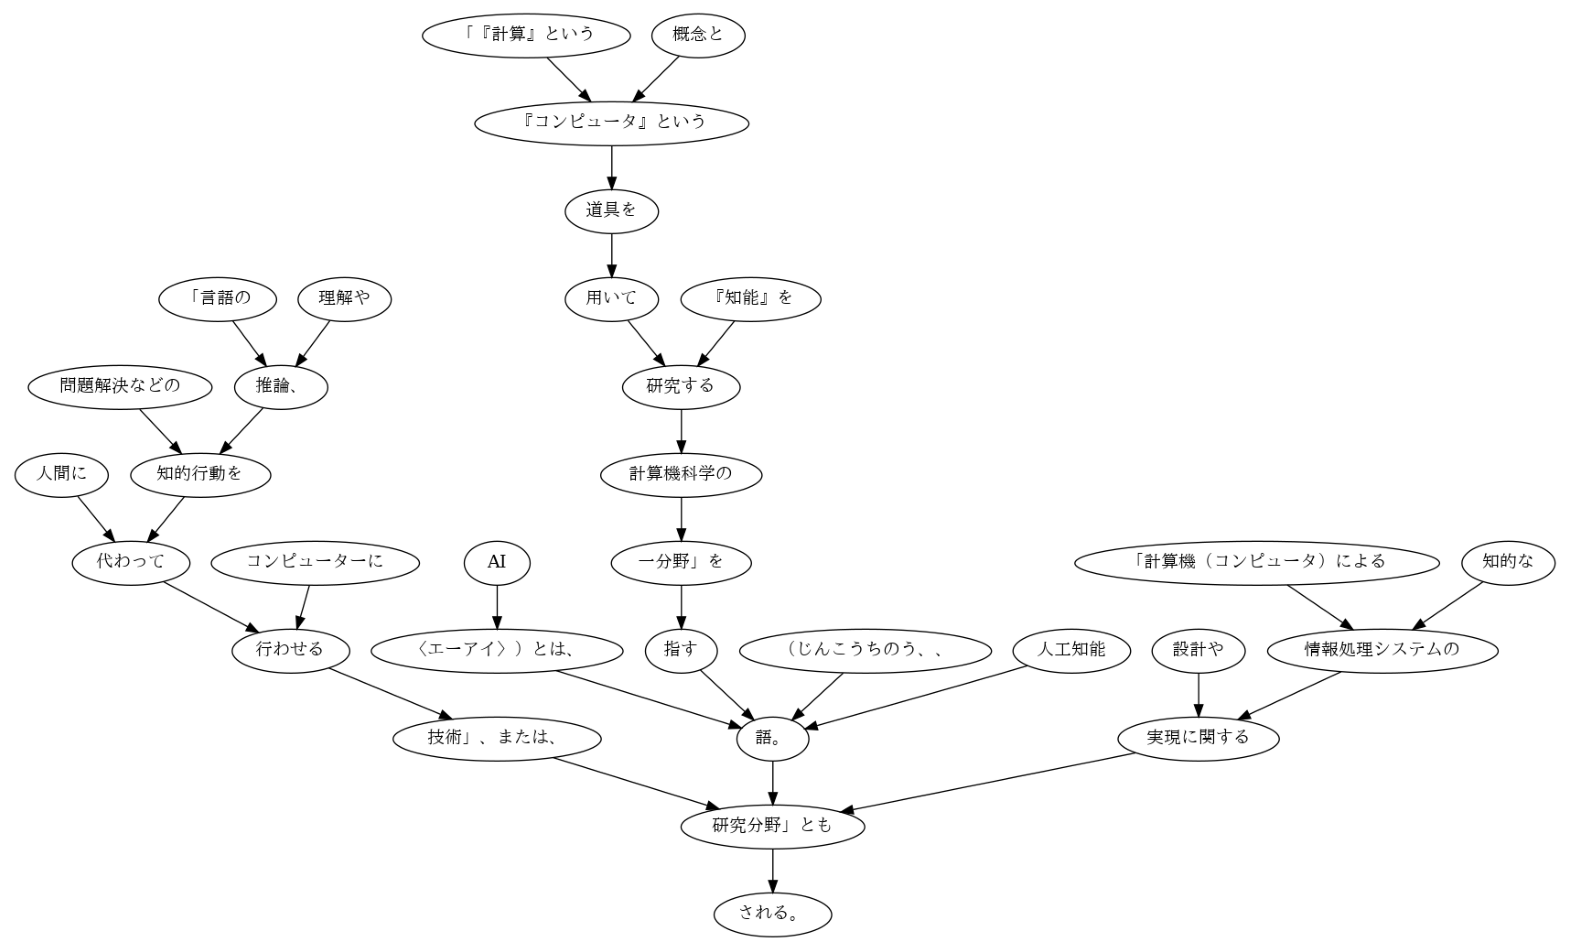

In [33]:
import graphviz
import matplotlib.pyplot as plt
from PIL import Image
import io

def visualize_tree(sent):
    dot = graphviz.Digraph()
    for i, chunk in enumerate(sent):
        dot.node(str(i), "".join([morph.surface for morph in chunk.morphs]))
        if chunk.dst != -1:
            dot.edge(str(i), str(chunk.dst))
    dot.attr("edge", fontname="IPAexGothic")
    dot.attr("node", fontname="IPAexGothic")
    img = dot.pipe(format="png")
    img = Image.open(io.BytesIO(img))
    plt.figure(figsize=(20, 20))
    plt.axis("off")
    plt.imshow(img)
    plt.show()

visualize_tree(chunks[2])

**45. 動詞の格パターンの抽出**

In [34]:
with open("case.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "動詞" in [morph.pos for morph in chunk.morphs]:
                verb = [morph.base for morph in chunk.morphs if morph.pos == "動詞"][0]
                cases = []
                for src in chunk.srcs:
                    case = [morph.base for morph in sent[src].morphs if morph.pos == "助詞"]
                    if len(case) > 0:
                        cases.append(case[-1])
                if len(cases) > 0:
                    cases = sorted(cases)
                    f.write(verb + "\t" + " ".join(cases) + "\n")

**46. 動詞の格フレーム情報の抽出**

In [35]:
with open("case2.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "動詞" in [morph.pos for morph in chunk.morphs]:
                verb = [morph.base for morph in chunk.morphs if morph.pos == "動詞"][0]
                cases = []
                morphs_case = []
                for src in chunk.srcs:
                    case = [morph.base for morph in sent[src].morphs if morph.pos == "助詞"]
                    if len(case) > 0:
                        cases.append(case[-1])
                        morphs_case.append("".join([m.surface for m in sent[src].morphs]))
                if len(cases) > 0:
                    sorted_idx = sorted(range(len(cases)), key=lambda x: cases[x])
                    cases = [cases[i] for i in sorted_idx]
                    morphs_case = [morphs_case[i] for i in sorted_idx]
                    cases += morphs_case
                    f.write(verb + "\t" + " ".join(cases) + "\n")

**47. 機能動詞構文のマイニング**

In [36]:
with open("case3.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "動詞" not in [morph.pos for morph in chunk.morphs]:
                continue
            
            verb = [morph.base for morph in chunk.morphs if morph.pos == "動詞"][0]
            pverb = ""
            cases = []
            morphs_case = []
            for src in chunk.srcs:
                case = [morph.base for morph in sent[src].morphs if morph.pos == "助詞"]
            
                if not case:
                    continue

                for m in sent[src].morphs:
                    if case[-1] != "を" or m.pos1 != "サ変接続":
                        continue
                    pverb = m.base + "を" + verb
                    break
                else:
                    cases.append(case[-1])
                    morphs_case.append("".join([m.surface for m in sent[src].morphs]))
            
            if not cases or not pverb:
                continue

            sorted_idx = sorted(range(len(cases)), key=lambda x: cases[x])
            cases = [cases[i] for i in sorted_idx]
            morphs_case = [morphs_case[i] for i in sorted_idx]
            cases += morphs_case
            f.write(pverb + "\t" + " ".join(cases) + "\n")

**48. 名詞から根へのパスの抽出**

In [37]:
with open("case4.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "名詞" not in [morph.pos for morph in chunk.morphs]:
                continue
            
            path = []
            while chunk.dst != -1:
                path.append("".join([m.surface for m in chunk.morphs if m.pos != "記号"]))
                chunk = sent[chunk.dst]
            
            if path:
                f.write(" -> ".join(path) + "\n")

**49. 名詞間の係り受けパスの抽出**

In [ ]:
with open("case5.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        chunks_noun = []
        for chunk in sent:
            if "名詞" not in [morph.pos for morph in chunk.morphs]:
                continue
            chunks_noun.append(chunk)
            
        for i, chunk_i in enumerate(chunks_noun[:-1]):
            for j, chunk_j in enumerate(chunks_noun[i+1:]):
                path = path_i = path_j = []
                while chunk_i.dst != -1:
                    path_i.append(chunk_i)
                    chunk_i = sent[chunk_i.dst]
                chunk_i = chunks_noun[i]
                while chunk_j.dst != -1:
                    path_j.append(chunk_j)
                    chunk_j = sent[chunk_j.dst]
                chunk_j = chunks_noun[i+j+1]

                if chunk_j in path_i:
                    path = path_i[path_i.index(chunk_j):]
                    path_surface = ["".join([m.surface for m in chunk.morphs if m.pos != "記号"]) for chunk in path]
                    f.write(" -> ".join(path_surface) + "\n")
                else:
                    for chunk_k in path_i:
                        if chunk_k in path_j:
                            paths = []
                            paths.append(path_i[:path_i.index(chunk_k)-1])
                            paths.append(path_j[:path_j.index(chunk_k)-1])
                            paths.append(chunk_k)
                            for i, p in enumerate(paths):
                                paths[i] = " -> ".join(["".join([m.surface for m in chunk.morphs if m.pos != "記号"]) for chunk in path])
                            f.write(" | ".join(paths) + "\n")
                            break